In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Set the style of the visualization
sns.set(style="whitegrid")

In [10]:
train_df = pd.read_csv('train_aWnotuB.csv')
test_df = pd.read_csv('test_BdBKkAj.csv')

In [16]:
#DataPreprocessing
# Convert 'DateTime' to datetime format
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

# Extract features from 'DateTime'
for df in [train_df, test_df]:
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Add IsWeekend feature
train_df['IsWeekend'] = train_df['DayOfWeek'] >= 5
test_df['IsWeekend'] = test_df['DayOfWeek'] >= 5

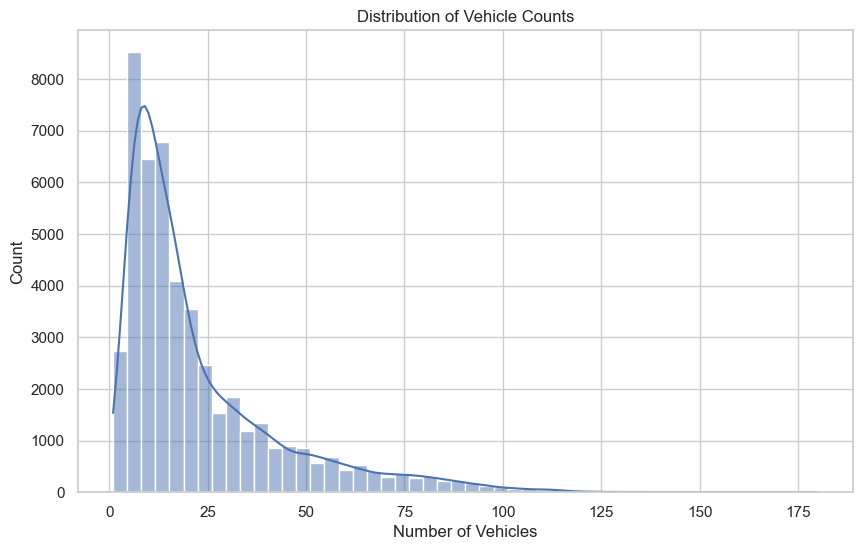

In [17]:
# Plot the distribution of vehicle counts
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Vehicles'], bins=50, kde=True)
plt.title('Distribution of Vehicle Counts')
plt.xlabel('Number of Vehicles')
plt.show()

C:\Users\Tirth Patel\AppData\Local\Temp\ipykernel_996\2052779437.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x='Hour', y='Vehicles', estimator='mean', ci=None)


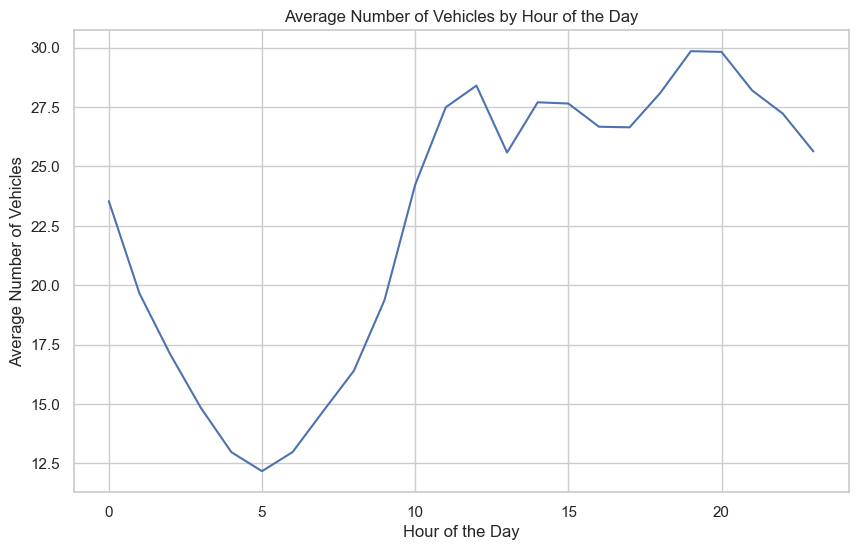

In [18]:
# Plot average number of vehicles by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='Hour', y='Vehicles', estimator='mean', ci=None)
plt.title('Average Number of Vehicles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Vehicles')
plt.show()

C:\Users\Tirth Patel\AppData\Local\Temp\ipykernel_996\1119230423.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x='DayOfWeek', y='Vehicles', estimator='mean', ci=None)


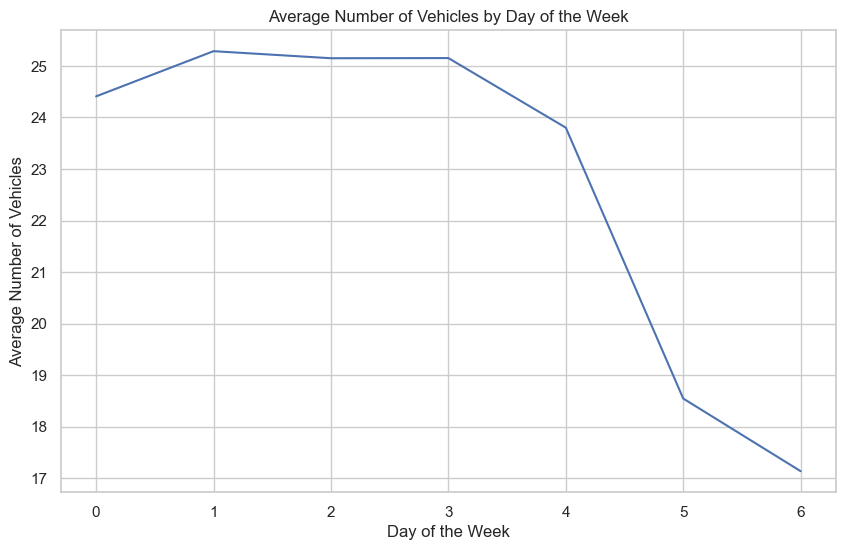

In [19]:
# Plot average number of vehicles by day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='DayOfWeek', y='Vehicles', estimator='mean', ci=None)
plt.title('Average Number of Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.show()

C:\Users\Tirth Patel\AppData\Local\Temp\ipykernel_996\3429629842.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train_df, x='Month', y='Vehicles', estimator='mean', ci=None)


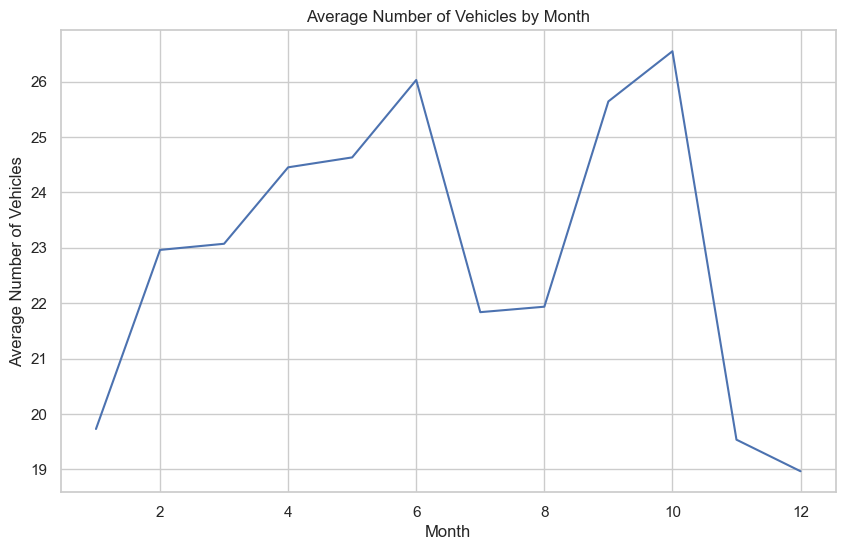

In [20]:
# Plot average number of vehicles by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_df, x='Month', y='Vehicles', estimator='mean', ci=None)
plt.title('Average Number of Vehicles by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')
plt.show()

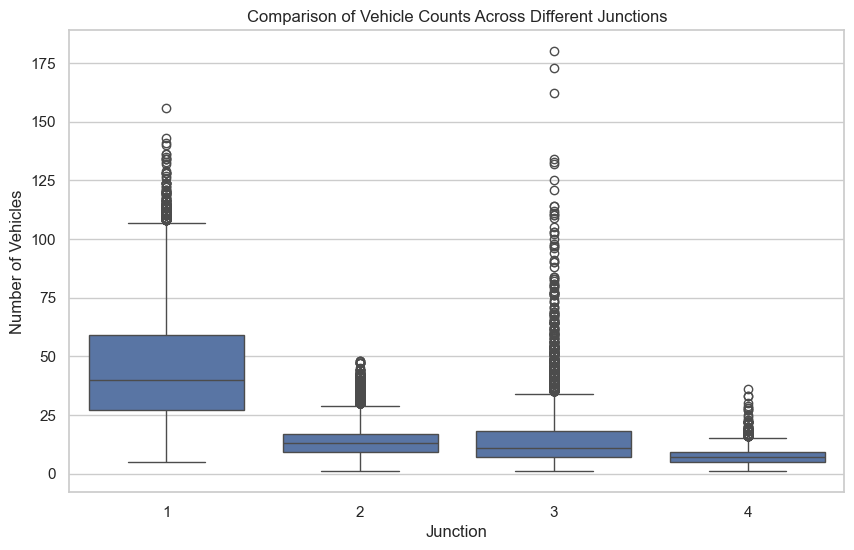

In [21]:
# Plot comparison of vehicle counts across different junctions
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Junction', y='Vehicles')
plt.title('Comparison of Vehicle Counts Across Different Junctions')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()

In [22]:
#ModelTraining
# Select features and target variable
features = ['Junction', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']
target = 'Vehicles'

X = train_df[features]
y = train_df[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.39872506234414


In [23]:
# Predict on the test set
test_features = test_df[features]
test_predictions = model.predict(test_features)
test_df['Vehicles'] = test_predictions

# Save the predictions to a new CSV file
test_df.to_csv('predicted_vehicles.csv', index=False)